<a href="https://colab.research.google.com/github/Trading-com-Dados/codigos_videos/blob/main/20210504_Live_Fronteira_Eficiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Selecionar ativos da carteira

In [ ]:
ativos = ['ABEV3.SA', 'EQTL3.SA', 'LREN3.SA', 'CIEL3.SA', 'RADL3.SA', 'RENT3.SA', 'MDIA3.SA', 'WEGE3.SA', 'EZTC3.SA', 'FLRY3.SA']

In [ ]:
# Criar um dataframe que vai conter as cotações diárias dessas ações

In [ ]:
df = pd.DataFrame()

for t in ativos:
  df[t] = wb.DataReader(t, data_source = 'yahoo', start = '2014-01-01', end = '2021-05-03')['Adj Close']

In [ ]:
# Visualizando os preços

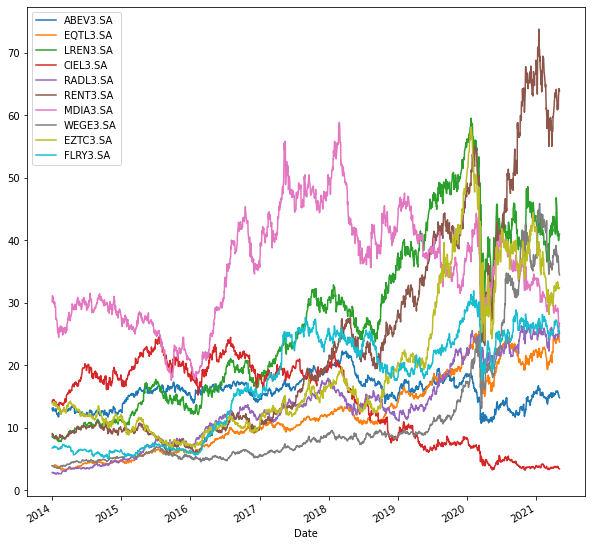

In [ ]:
df.plot(figsize = (10,10))

In [ ]:
df.head()

,ABEV3.SA,EQTL3.SA,LREN3.SA,CIEL3.SA,RADL3.SA,RENT3.SA,MDIA3.SA,WEGE3.SA,EZTC3.SA,FLRY3.SA
Date,,,,,,,,,,
2014-01-02,13.098940,3.896410,8.558114,14.131912,2.825927,8.906285,30.161831,3.915017,13.880144,6.744945
2014-01-03,12.820243,3.831441,8.678512,14.311474,2.783026,9.083050,31.136665,3.878957,13.919847,6.744945
2014-01-06,12.654528,3.790407,8.556666,14.328570,2.829659,8.895407,30.711891,3.899563,13.890068,6.818258
2014-01-07,13.053751,3.790407,8.726377,14.493167,2.844581,8.835577,30.864687,3.896986,13.949618,6.818258
2014-01-08,13.181801,3.805795,8.710419,14.514546,2.844581,8.865490,30.559093,3.830020,13.895031,6.895238


In [ ]:
# Calculando retorno diário dos papéis

In [ ]:
retorno_diario = df.pct_change()

In [ ]:
retorno_diario.head()

,ABEV3.SA,EQTL3.SA,LREN3.SA,CIEL3.SA,RADL3.SA,RENT3.SA,MDIA3.SA,WEGE3.SA,EZTC3.SA,FLRY3.SA
Date,,,,,,,,,,
2014-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,-0.021276,-0.016674,0.014068,0.012706,-0.015181,0.019847,0.032320,-0.009211,0.002860,0.000000
2014-01-06,-0.012926,-0.010710,-0.014040,0.001195,0.016756,-0.020659,-0.013642,0.005312,-0.002139,0.010869
2014-01-07,0.031548,0.000000,0.019834,0.011487,0.005274,-0.006726,0.004975,-0.000661,0.004287,0.000000
2014-01-08,0.009809,0.004060,-0.001829,0.001475,0.000000,0.003386,-0.009901,-0.017184,-0.003913,0.011290


In [ ]:
retorno_diario = retorno_diario.iloc[1:]

In [ ]:
retorno_diario.head()

,ABEV3.SA,EQTL3.SA,LREN3.SA,CIEL3.SA,RADL3.SA,RENT3.SA,MDIA3.SA,WEGE3.SA,EZTC3.SA,FLRY3.SA
Date,,,,,,,,,,
2014-01-03,-0.021276,-0.016674,0.014068,0.012706,-0.015181,0.019847,0.032320,-0.009211,0.002860,0.000000
2014-01-06,-0.012926,-0.010710,-0.014040,0.001195,0.016756,-0.020659,-0.013642,0.005312,-0.002139,0.010869
2014-01-07,0.031548,0.000000,0.019834,0.011487,0.005274,-0.006726,0.004975,-0.000661,0.004287,0.000000
2014-01-08,0.009809,0.004060,-0.001829,0.001475,0.000000,0.003386,-0.009901,-0.017184,-0.003913,0.011290
2014-01-09,-0.023429,0.010782,-0.033139,-0.007364,-0.036066,-0.041411,-0.018400,-0.018158,-0.021429,-0.013291


In [ ]:
retorno_anual = retorno_diario.mean()*250

In [ ]:
cov_diario = retorno_diario.cov()

In [ ]:
cov_diario

,ABEV3.SA,EQTL3.SA,LREN3.SA,CIEL3.SA,RADL3.SA,RENT3.SA,MDIA3.SA,WEGE3.SA,EZTC3.SA,FLRY3.SA
ABEV3.SA,0.000297,0.000122,0.000185,0.000182,0.000119,0.000183,0.000138,0.000143,0.000192,0.000113
EQTL3.SA,0.000122,0.000308,0.000203,0.000181,0.000109,0.000214,0.000122,0.000128,0.000241,0.000136
LREN3.SA,0.000185,0.000203,0.000562,0.000242,0.000189,0.000377,0.000186,0.000193,0.000370,0.000211
CIEL3.SA,0.000182,0.000181,0.000242,0.000753,0.000151,0.000285,0.000192,0.000184,0.000264,0.000158
RADL3.SA,0.000119,0.000109,0.000189,0.000151,0.000401,0.000189,0.000120,0.000151,0.000179,0.000112
RENT3.SA,0.000183,0.000214,0.000377,0.000285,0.000189,0.000723,0.000221,0.000222,0.000401,0.000209
MDIA3.SA,0.000138,0.000122,0.000186,0.000192,0.000120,0.000221,0.000466,0.000170,0.000249,0.000143
WEGE3.SA,0.000143,0.000128,0.000193,0.000184,0.000151,0.000222,0.000170,0.000453,0.000214,0.000125
EZTC3.SA,0.000192,0.000241,0.000370,0.000264,0.000179,0.000401,0.000249,0.000214,0.000772,0.000213
FLRY3.SA,0.000113,0.000136,0.000211,0.000158,0.000112,0.000209,0.000143,0.000125,0.000213,0.000425


In [ ]:
cov_anual = cov_diario*250

# Iniciando Simulação de Monte Carlo

In [ ]:
# Aqui vamos criar 200 mil portfólios fictícios com esses papéis

In [ ]:
port_returns = []

port_volatility = []

stock_weights = []

In [ ]:
# Vamos passar os parâmetros de simulação

In [ ]:
num_assets = len(ativos)

num_portfolios = 200000

In [ ]:
# Vamos usar a função random para criar 10 pesos aleatórios

In [ ]:
peso = np.random.random(num_assets)

In [ ]:
peso /= np.sum(peso)

In [ ]:
peso

array([0.02850946, 0.00605301, 0.26965927, 0.20223515, 0.03543795,
       0.22329197, 0.00173248, 0.07448837, 0.06833588, 0.09025647])

In [ ]:
np.sum(peso)

1.0

In [ ]:
for single_portfolio in range(num_portfolios):
  weights = np.random.random(num_assets)
  weights /= np.sum(weights)
  returns = np.dot(weights, retorno_anual)
  volatility = np.sqrt(np.dot(weights.T, np.dot(cov_anual, weights)))
  port_returns.append(returns)
  port_volatility.append(volatility)
  stock_weights.append(weights)

In [ ]:
portfolio = {'Retornos': port_returns, 'Volatilidade': port_volatility}

In [ ]:
for counter,symbol in enumerate(ativos):
  portfolio[symbol+' peso'] = [weight[counter] for weight in stock_weights]

df = pd.DataFrame(portfolio)

In [ ]:
df.head()

,Retornos,Volatilidade,ABEV3.SA peso,EQTL3.SA peso,LREN3.SA peso,CIEL3.SA peso,RADL3.SA peso,RENT3.SA peso,MDIA3.SA peso,WEGE3.SA peso,EZTC3.SA peso,FLRY3.SA peso
0,0.215228,0.249326,0.030038,0.062995,0.017294,0.072878,0.153358,0.175568,0.179755,0.026291,0.149119,0.132704
1,0.192592,0.241963,0.136665,0.037037,0.138134,0.123685,0.113119,0.150963,0.119344,0.049078,0.036803,0.095171
2,0.207367,0.225941,0.263916,0.049590,0.070168,0.095653,0.181122,0.080083,0.023746,0.153948,0.028183,0.053592
3,0.155986,0.231907,0.217799,0.025738,0.101631,0.157267,0.138467,0.030338,0.113875,0.079059,0.070401,0.065426
4,0.219364,0.253917,0.042535,0.147595,0.150660,0.137655,0.100816,0.159145,0.073957,0.056479,0.096719,0.034440


In [ ]:
retornos = df.sort_values(by = ['Retornos'], ascending = False)

In [ ]:
retornos.head()

,Retornos,Volatilidade,ABEV3.SA peso,EQTL3.SA peso,LREN3.SA peso,CIEL3.SA peso,RADL3.SA peso,RENT3.SA peso,MDIA3.SA peso,WEGE3.SA peso,EZTC3.SA peso,FLRY3.SA peso
68258,0.320700,0.241625,0.009659,0.183463,0.023063,0.007768,0.205464,0.238743,0.003830,0.201132,0.012447,0.114431
199992,0.320619,0.245662,0.023108,0.048534,0.065897,0.016337,0.363207,0.085610,0.031680,0.330547,0.033385,0.001694
144626,0.319516,0.262080,0.013300,0.071260,0.064289,0.012513,0.158597,0.319267,0.006573,0.213432,0.034698,0.106070
179906,0.318386,0.256293,0.013547,0.176792,0.060406,0.031758,0.312391,0.299127,0.016456,0.086714,0.000179,0.002631
50013,0.317041,0.249608,0.034078,0.126478,0.056717,0.001157,0.266994,0.221045,0.012685,0.180904,0.080495,0.019447


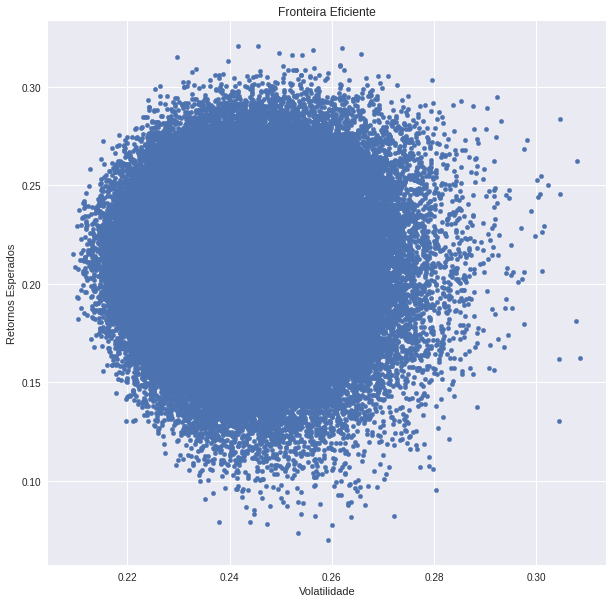

In [ ]:
plt.style.use('seaborn')

df.plot.scatter(x = 'Volatilidade', y = 'Retornos', figsize = (10,10), grid = True)

plt.xlabel('Volatilidade')

plt.ylabel('Retornos Esperados')

plt.title('Fronteira Eficiente')

plt.show()

In [ ]:
retorno_max = retornos.iloc[:1]

In [ ]:
retorno_max = retorno_max.drop(['Retornos', 'Volatilidade'], axis = 1)

In [ ]:
retorno_max

,ABEV3.SA peso,EQTL3.SA peso,LREN3.SA peso,CIEL3.SA peso,RADL3.SA peso,RENT3.SA peso,MDIA3.SA peso,WEGE3.SA peso,EZTC3.SA peso,FLRY3.SA peso
68258,0.009659,0.183463,0.023063,0.007768,0.205464,0.238743,0.00383,0.201132,0.012447,0.114431


In [ ]:
ativos

['ABEV3.SA',
 'EQTL3.SA',
 'LREN3.SA',
 'CIEL3.SA',
 'RADL3.SA',
 'RENT3.SA',
 'MDIA3.SA',
 'WEGE3.SA',
 'EZTC3.SA',
 'FLRY3.SA']

In [ ]:
pesos = np.array(retorno_max)

In [ ]:
pesos

array([[0.00965876, 0.18346266, 0.02306322, 0.00776843, 0.20546412,
        0.23874333, 0.00383029, 0.2011317 , 0.01244672, 0.11443077]])

In [ ]:
retorno_carteira = retorno_diario*pesos

In [ ]:
retorno_carteira = retorno_carteira.sum(axis = 1)

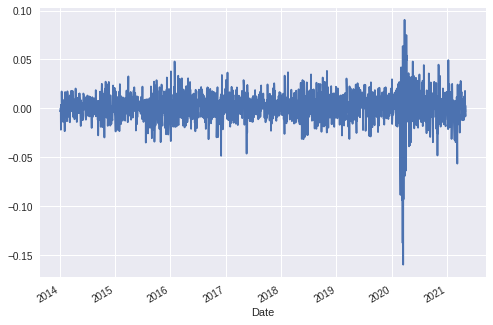

In [ ]:
retorno_carteira.plot()

In [ ]:
# Retorno acumulado

In [ ]:
returns_acm = (1 + retorno_carteira).cumprod()

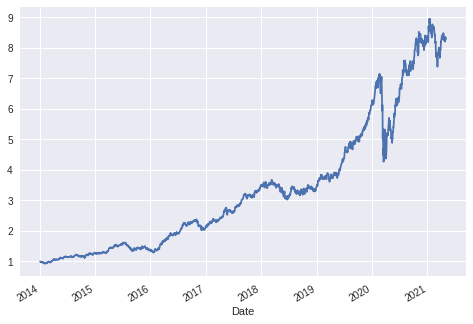

In [ ]:
returns_acm.plot()

In [ ]:
# Importando dados do IBOV para Benchmark

In [ ]:
ibov = wb.DataReader('^BVSP', data_source = 'yahoo', start = '2014-01-01', end = '2021-05-03')['Adj Close']

In [ ]:
type(ibov)

pandas.core.series.Series

In [ ]:
ibov_retornos = ibov.pct_change()

In [ ]:
ibov_retornos_acm = (1 + ibov_retornos).cumprod()

In [ ]:
pd.DataFrame(ibov_retornos_acm)

,Adj Close
Date,
2014-01-02,NaN
2014-01-03,1.012713
2014-01-06,1.012574
2014-01-07,1.001768
2014-01-08,1.004688
...,...
2021-04-27,2.371586
2021-04-28,2.404660
2021-04-29,2.385054


In [ ]:
novo_df = pd.merge(pd.DataFrame(ibov_retornos_acm), pd.DataFrame(returns_acm, columns = ['Minha Carteira']), how = 'inner', on = 'Date')

In [ ]:
novo_df.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [ ]:
novo_df.head()

,IBOV,Minha Carteira
Date,,
2014-01-03,1.012713,0.997085
2014-01-06,1.012574,0.995429
2014-01-07,1.001768,0.995697
2014-01-08,1.004688,0.995066
2014-01-09,0.979758,0.973297


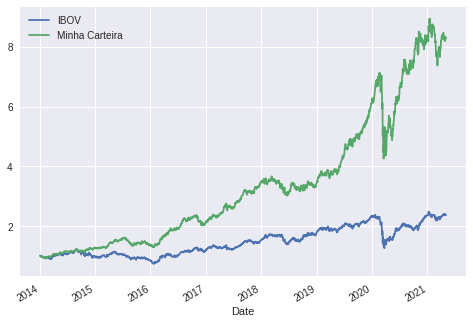

In [ ]:
novo_df.plot()